**Chapter 10 – Introduction to Artificial Neural Networks**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42, verbose=4)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

-- Epoch 1
Norm: 1.70, NNZs: 2, Bias: 3.000000, T: 150, Avg. loss: 0.169800
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.70, NNZs: 2, Bias: 3.000000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.70, NNZs: 2, Bias: 3.000000, T: 450, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.70, NNZs: 2, Bias: 3.000000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.70, NNZs: 2, Bias: 3.000000, T: 750, Avg. loss: 0.000000
Total training time: 0.00 seconds.


/anaconda/envs/ml_env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [3]:
y_pred

array([1])

/anaconda/envs/ml_env/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


Saving figure perceptron_iris_plot


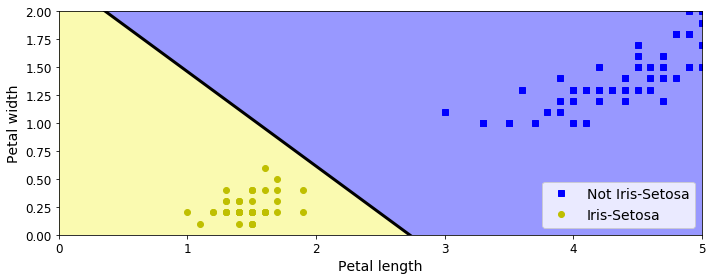

In [9]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [16]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def derivative(f, z, eps=0.000001):
    """
    The mathematical definition of derivative
    """
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


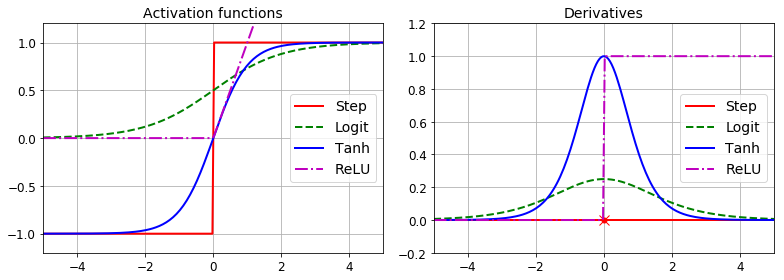

In [20]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
# plt.plot(z, sigmoid(z), "c|", linewidth=2, label="sigmoid")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
# plt.plot(z, derivative(sigmoid, z), "c:", linewidth=2, label="Sigmoid")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [21]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    "equal to (x1.x2)'+(x1+x2) in logic !"
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

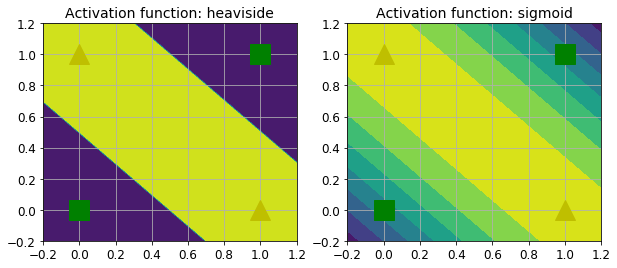

In [22]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## using tf.learn

In [24]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

/anaconda/envs/ml_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [27]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

numpy.ndarray

In [30]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c29c17898>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/48/tc68rwf51_b1qwqw5c1glvg80000gn/T/tmprt3d5cbr'}
Instructions for updating:
Please switch to tf.train.get_global_step
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/48/tc68rwf51_b1qwqw5c1glvg80000gn/T/tmprt3d5cbr/model.ckpt.
INFO:tensorflow:loss = 2.40058, step = 1
INFO:tensorflow:global_step/sec: 199.887
INFO:

INFO:tensorflow:global_step/sec: 233.827
INFO:tensorflow:loss = 0.00836719, step = 7101 (0.428 sec)
INFO:tensorflow:global_step/sec: 223.396
INFO:tensorflow:loss = 0.0488339, step = 7201 (0.447 sec)
INFO:tensorflow:global_step/sec: 218.73
INFO:tensorflow:loss = 0.00950404, step = 7301 (0.457 sec)
INFO:tensorflow:global_step/sec: 228.421
INFO:tensorflow:loss = 0.0169789, step = 7401 (0.438 sec)
INFO:tensorflow:global_step/sec: 218.924
INFO:tensorflow:loss = 0.0107572, step = 7501 (0.457 sec)
INFO:tensorflow:global_step/sec: 224.89
INFO:tensorflow:loss = 0.0105873, step = 7601 (0.445 sec)
INFO:tensorflow:global_step/sec: 223.649
INFO:tensorflow:loss = 0.00593114, step = 7701 (0.447 sec)
INFO:tensorflow:global_step/sec: 225.493
INFO:tensorflow:loss = 0.00519743, step = 7801 (0.445 sec)
INFO:tensorflow:global_step/sec: 220.873
INFO:tensorflow:loss = 0.00644975, step = 7901 (0.452 sec)
INFO:tensorflow:global_step/sec: 217.276
INFO:tensorflow:loss = 0.00205743, step = 8001 (0.460 sec)
INFO:t

INFO:tensorflow:global_step/sec: 213.546
INFO:tensorflow:loss = 0.00229391, step = 15301 (0.468 sec)
INFO:tensorflow:global_step/sec: 222.052
INFO:tensorflow:loss = 0.0028404, step = 15401 (0.450 sec)
INFO:tensorflow:global_step/sec: 219.05
INFO:tensorflow:loss = 0.00541212, step = 15501 (0.457 sec)
INFO:tensorflow:global_step/sec: 218.059
INFO:tensorflow:loss = 0.00358959, step = 15601 (0.459 sec)
INFO:tensorflow:global_step/sec: 224.267
INFO:tensorflow:loss = 0.00588915, step = 15701 (0.446 sec)
INFO:tensorflow:global_step/sec: 204.926
INFO:tensorflow:loss = 0.000818647, step = 15801 (0.488 sec)
INFO:tensorflow:global_step/sec: 205.671
INFO:tensorflow:loss = 0.000857814, step = 15901 (0.486 sec)
INFO:tensorflow:global_step/sec: 221.397
INFO:tensorflow:loss = 0.00651137, step = 16001 (0.452 sec)
INFO:tensorflow:global_step/sec: 221.431
INFO:tensorflow:loss = 0.00306222, step = 16101 (0.451 sec)
INFO:tensorflow:global_step/sec: 224.859
INFO:tensorflow:loss = 0.000188798, step = 16201 (

INFO:tensorflow:global_step/sec: 182.216
INFO:tensorflow:loss = 0.000505153, step = 23401 (0.549 sec)
INFO:tensorflow:global_step/sec: 238.455
INFO:tensorflow:loss = 0.000766654, step = 23501 (0.419 sec)
INFO:tensorflow:global_step/sec: 183.999
INFO:tensorflow:loss = 0.000556651, step = 23601 (0.543 sec)
INFO:tensorflow:global_step/sec: 223.721
INFO:tensorflow:loss = 0.000105218, step = 23701 (0.447 sec)
INFO:tensorflow:global_step/sec: 223.874
INFO:tensorflow:loss = 0.000919802, step = 23801 (0.448 sec)
INFO:tensorflow:global_step/sec: 218.649
INFO:tensorflow:loss = 0.00179801, step = 23901 (0.457 sec)
INFO:tensorflow:global_step/sec: 197.418
INFO:tensorflow:loss = 0.00146623, step = 24001 (0.507 sec)
INFO:tensorflow:global_step/sec: 213.169
INFO:tensorflow:loss = 0.000645721, step = 24101 (0.471 sec)
INFO:tensorflow:global_step/sec: 201.141
INFO:tensorflow:loss = 0.00170859, step = 24201 (0.495 sec)
INFO:tensorflow:global_step/sec: 211.489
INFO:tensorflow:loss = 0.000190123, step = 2

INFO:tensorflow:global_step/sec: 195.961
INFO:tensorflow:loss = 0.000200015, step = 31501 (0.510 sec)
INFO:tensorflow:global_step/sec: 159.81
INFO:tensorflow:loss = 0.000326743, step = 31601 (0.629 sec)
INFO:tensorflow:global_step/sec: 161.744
INFO:tensorflow:loss = 0.000636576, step = 31701 (0.618 sec)
INFO:tensorflow:global_step/sec: 156.19
INFO:tensorflow:loss = 0.000169163, step = 31801 (0.639 sec)
INFO:tensorflow:global_step/sec: 156.033
INFO:tensorflow:loss = 0.00069206, step = 31901 (0.642 sec)
INFO:tensorflow:global_step/sec: 162.285
INFO:tensorflow:loss = 0.000129269, step = 32001 (0.615 sec)
INFO:tensorflow:global_step/sec: 194.129
INFO:tensorflow:loss = 0.000392807, step = 32101 (0.513 sec)
INFO:tensorflow:global_step/sec: 222.302
INFO:tensorflow:loss = 0.00115589, step = 32201 (0.452 sec)
INFO:tensorflow:global_step/sec: 169.494
INFO:tensorflow:loss = 0.00056562, step = 32301 (0.588 sec)
INFO:tensorflow:global_step/sec: 212.348
INFO:tensorflow:loss = 0.000176759, step = 324

INFO:tensorflow:global_step/sec: 218.064
INFO:tensorflow:loss = 0.000623901, step = 39601 (0.459 sec)
INFO:tensorflow:global_step/sec: 221.521
INFO:tensorflow:loss = 0.000144656, step = 39701 (0.452 sec)
INFO:tensorflow:global_step/sec: 224.079
INFO:tensorflow:loss = 0.00113882, step = 39801 (0.445 sec)
INFO:tensorflow:global_step/sec: 223.913
INFO:tensorflow:loss = 0.000799873, step = 39901 (0.447 sec)
INFO:tensorflow:Saving checkpoints for 40000 into /var/folders/48/tc68rwf51_b1qwqw5c1glvg80000gn/T/tmprt3d5cbr/model.ckpt.
INFO:tensorflow:Loss for final step: 0.00044029.


SKCompat()

In [31]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Restoring parameters from /var/folders/48/tc68rwf51_b1qwqw5c1glvg80000gn/T/tmprt3d5cbr/model.ckpt-40000


0.98350000000000004

In [32]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.071474514666464845

## Using plain TensorFlow

In [111]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [112]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [113]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [37]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [114]:
with tf.name_scope("built_in_dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [115]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [116]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [117]:
with tf.name_scope("eval"):
    # a metrix with entries 1 if logits predict the same as class y
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [118]:
from datetime import datetime

time_now = datetime.now().strftime("%Y%m%d%H%M%S")

with tf.name_scope("summary"):
    file_writer = tf.summary.FileWriter("ann/{}".format(time_now), tf.get_default_graph())
    accuracy_summary = tf.summary.scalar("accuracy", accuracy)
    

In [119]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [120]:
n_epochs = 40
batch_size = 50

In [122]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size + 1):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
#         acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
#                                             y: mnist.validation.labels})
        acc_val, str_acc = sess.run([accuracy, accuracy_summary], feed_dict={X: mnist.validation.images,
                                                                             y: mnist.validation.labels})
        file_writer.add_summary(str_acc, epoch)
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    # Can use this with global to restore from the most recent run
    save_path = saver.save(sess, "./my_model_final.ckpt")
    file_writer.close()

0 Train accuracy: 0.88 Val accuracy: 0.9022
1 Train accuracy: 0.96 Val accuracy: 0.9226
2 Train accuracy: 0.94 Val accuracy: 0.935
3 Train accuracy: 1.0 Val accuracy: 0.9428
4 Train accuracy: 0.98 Val accuracy: 0.9468
5 Train accuracy: 0.94 Val accuracy: 0.9524
6 Train accuracy: 0.92 Val accuracy: 0.9558
7 Train accuracy: 0.92 Val accuracy: 0.9598
8 Train accuracy: 0.98 Val accuracy: 0.9624
9 Train accuracy: 0.96 Val accuracy: 0.965
10 Train accuracy: 1.0 Val accuracy: 0.9664
11 Train accuracy: 0.98 Val accuracy: 0.9672
12 Train accuracy: 0.98 Val accuracy: 0.9692
13 Train accuracy: 0.98 Val accuracy: 0.9698
14 Train accuracy: 0.98 Val accuracy: 0.9708
15 Train accuracy: 0.98 Val accuracy: 0.9714
16 Train accuracy: 0.98 Val accuracy: 0.9722
17 Train accuracy: 0.98 Val accuracy: 0.9736
18 Train accuracy: 0.96 Val accuracy: 0.9732
19 Train accuracy: 0.94 Val accuracy: 0.9746
20 Train accuracy: 0.98 Val accuracy: 0.976
21 Train accuracy: 0.98 Val accuracy: 0.9744
22 Train accuracy: 0.98 V

In [123]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    # note here Z is not the probability. Rather, Z is the value before activation. Since softmax is a
    # strictly increasing function. It doesn't matter the probability for prediction
    y_pred = np.argmax(Z, axis=1)
    print(len(Z))
    print(len(Z[0]))
    print(tf.shape(Z).eval())
    print(y_pred)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
20
10
[20 10]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [124]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [127]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [128]:
show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`

Note: the book uses `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [28]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [29]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [30]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [31]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [32]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [33]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [34]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [35]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.9 Test accuracy: 0.9053
1 Train accuracy: 0.88 Test accuracy: 0.9206
2 Train accuracy: 0.94 Test accuracy: 0.9301
3 Train accuracy: 0.94 Test accuracy: 0.9397
4 Train accuracy: 0.92 Test accuracy: 0.9451
5 Train accuracy: 0.94 Test accuracy: 0.9476
6 Train accuracy: 0.92 Test accuracy: 0.9515
7 Train accuracy: 0.98 Test accuracy: 0.9546
8 Train accuracy: 0.96 Test accuracy: 0.9569
9 Train accuracy: 0.94 Test accuracy: 0.9605
10 Train accuracy: 0.92 Test accuracy: 0.9619
11 Train accuracy: 0.96 Test accuracy: 0.9631
12 Train accuracy: 1.0 Test accuracy: 0.9661
13 Train accuracy: 0.94 Test accuracy: 0.9657
14 Train accuracy: 1.0 Test accuracy: 0.9669
15 Train accuracy: 0.94 Test accuracy: 0.9682
16 Train accuracy: 0.96 Test accuracy: 0.9701
17 Train accuracy: 0.98 Test accuracy: 0.9696
18 Train accuracy: 1.0 Test accuracy: 0.97
19 Train accuracy: 1.0 Test accuracy: 0.971


In [36]:
show_graph(tf.get_default_graph())

# Exercise solutions

## 1. to 8.

See appendix A.

## 9.

_Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on)._

First let's create the deep net. It's exactly the same as earlier, with just one addition: we add a `tf.summary.scalar()` to track the loss and the accuracy during training, so we can view nice learning curves using TensorBoard.

In [37]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [38]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [39]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [40]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [41]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [42]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [43]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Now we need to define the directory to write the TensorBoard logs to:

In [44]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [45]:
logdir = log_dir("mnist_dnn")

Now we can create the `FileWriter` that we will use to write the TensorBoard logs:

In [46]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

Hey! Why don't we implement early stopping? For this, we are going to need a validation set. Luckily, the dataset returned by TensorFlow's `input_data()` function (see above) is already split into a training set (60,000 instances, already shuffled for us), a validation set (5,000 instances) and a test set (5,000 instances). So we can easily define `X_valid` and `y_valid`:

In [47]:
X_valid = mnist.validation.images
y_valid = mnist.validation.labels

In [48]:
m, n = X_train.shape

In [49]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 90.440% 	Loss: 0.35228
Epoch: 5 	Validation accuracy: 95.060% 	Loss: 0.17539
Epoch: 10 	Validation accuracy: 96.680% 	Loss: 0.12546
Epoch: 15 	Validation accuracy: 97.220% 	Loss: 0.10438
Epoch: 20 	Validation accuracy: 97.600% 	Loss: 0.08914
Epoch: 25 	Validation accuracy: 97.740% 	Loss: 0.08115
Epoch: 30 	Validation accuracy: 97.780% 	Loss: 0.07788
Epoch: 35 	Validation accuracy: 97.920% 	Loss: 0.07094
Epoch: 40 	Validation accuracy: 97.920% 	Loss: 0.06983
Epoch: 45 	Validation accuracy: 97.880% 	Loss: 0.06778
Epoch: 50 	Validation accuracy: 98.100% 	Loss: 0.06649
Epoch: 55 	Validation accuracy: 98.080% 	Loss: 0.06642
Epoch: 60 	Validation accuracy: 98.220% 	Loss: 0.06510
Epoch: 65 	Validation accuracy: 98.060% 	Loss: 0.06588
Epoch: 70 	Validation accuracy: 98.080% 	Loss: 0.06762
Epoch: 75 	Validation accuracy: 98.160% 	Loss: 0.06705
Epoch: 80 	Validation accuracy: 98.160% 	Loss: 0.06705
Epoch: 85 	Validation accuracy: 98.200% 	Loss: 0.06709
Epoch: 90 	V

In [50]:
os.remove(checkpoint_epoch_path)

In [51]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [52]:
accuracy_val

0.97839999